### Kaggle - Yelp dataset 분석

In [1]:
from folium.plugins import MarkerCluster
from ast import literal_eval
from datetime import datetime
from scipy.stats import shapiro
from scipy.stats import f

import folium
import collections
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import sys
import scipy

%matplotlib inline

In [2]:
#business data 불러오기
business_data = pd.read_csv("./data/csv/yelp_academic_dataset_business.csv")
business_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",NaN
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': ""{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [3]:
#tip data 불러오기
tip_data = pd.read_csv("./data/csv/yelp_academic_dataset_tip.csv")
tip_data.head()

,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


In [4]:
#checkin data 불러오기
checkin_data = pd.read_csv("./data/csv/yelp_academic_dataset_checkin.csv")
checkin_data.head()

,business_id,date
0,--0r8K_AQ4FZfLsX3ZYRDA,2017-09-03 17:13:59
1,--0zrn43LEaB4jUWTQH_Bg,"2010-10-08 22:21:20, 2010-11-01 21:29:14, 2010..."
2,--164t1nclzzmca7eDiJMw,"2010-02-26 02:06:53, 2010-02-27 08:00:09, 2010..."
3,--2aF9NhXnNVpDV0KS3xBQ,"2014-11-03 16:35:35, 2015-01-30 18:16:03, 2015..."
4,--2mEJ63SC_8_08_jGgVIg,"2010-12-15 17:10:46, 2013-12-28 00:27:54, 2015..."


In [5]:
#user data 불러오기
user_data = pd.read_csv("./data/csv/yelp_academic_dataset_user.csv")
user_data.head()

,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0


### Q1. 2017년 오리건주(state=OR)에서 별점이 3.0 이상인 레스토랑 중 체크인이 가장 많은 top10 레스토랑명을 내림차순으로 나열


In [6]:
#1. business data: 필요한 컬럼만 가져오기
business = business_data[['business_id', 'name','state', 'stars']]

In [7]:
#2 2017년도 체크인 횟수 카운트하는 함수 생성
def checkin_2017(checkin_list):
    cnt = len([x for x in checkin_list if '2017' in x])
    return cnt

In [8]:
#3. date 컬럼: ',' 로 구분하여, 리스트 형태로 변경 & checkin_2017 변수 생성
checkin_data['checkin_2017'] = checkin_data['date'].str.split(",").apply(checkin_2017)

#4. business data와 checkin data 결합: business_checkin
business_checkin = pd.merge(left = business, right=checkin_data, on='business_id')

#5. business_checkin 데이터에서 오리건주, 별점 3.0 이상 레스토랑 추출
business1 = business_checkin[(business_checkin['state']=='OR') & (business_checkin['stars']>=3.0)]

#6. 2017년 체크인 횟수 기준 내림차순 정렬 후 top 10 레스토랑명 추출
checkin_top10 = business1.sort_values(by='checkin_2017', ascending=False).head(10)
checkin_top10.reset_index(drop=True, inplace=True)

checkin_top10[['name', 'checkin_2017']]

,name,checkin_2017
0,Portland International Airport - PDX,7634
1,Pip's Original Doughnuts & Chai,2443
2,Screen Door,2443
3,Powell's City of Books,2392
4,Ruby Jewel,2174
5,Pok Pok,2116
6,Tasty n Alder,2029
7,Voodoo Doughnut - Old Town,1949
8,Deschutes Brewery Portland Public House,1871
9,Blue Star Donuts,1599


### Q2. 포틀랜드에서 피자 가게 창업 예정. 다만, 24시간 영업을 하여 수익을 극대화할 수 있을지 고민. 등록된 여러 데이터를 활용해 24시간영업의 타당성을 검증해보세요(피자 가격 등 가설을 증명하는데 필요한 정보나 상황은 자유롭게 가정)

In [9]:
#business data와 checkin data 결합
business_check1 = pd.merge(left = business_data, right=checkin_data, on='business_id')

#영업중(is_open=1) 인 곳으로 한정하여 데이터 분석 수행
business_check2 = business_check1[business_check1['is_open']==1]
business_check2.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date,checkin_2017
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...","2017-09-10 04:48:12, 2017-09-10 04:49:28, 2017...",28
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...","2010-04-22 05:31:33, 2010-05-09 18:24:50, 2010...",108
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...","2013-11-01 06:40:42, 2013-11-21 23:53:00, 2013...",4
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",NaN,"2011-11-04 21:00:28, 2011-12-07 22:10:28, 2012...",3
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': ""{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...","2013-10-25 21:12:21, 2013-10-30 23:07:04, 2013...",0


### 1. 영업 시간 관련하여 파생 변수 생성
- tot_hours : 사업장 별 주 단위 총 영업시간
- day_open_hours: 사업장의 요일 별 영업시간
- open_days : 사업장의 영업일수
- checkin_cnt : 사업장의 총 체크인 횟수
- open_hour_avg : 사업장의 평균 영업시간
- open_hour : 영업 오픈시간
- closed_hour : 영업 종료 시간

In [10]:
# 사업장 별 주 단위 총 영업시간 계산 위한 함수 생성

def tot_open_hour(list_):
    try:
        result = 0
        final_result = 0
        
        for k, v in list_.items():
            k, v = k, v.split('-')
            k, v = k, [datetime.strptime(v, '%H:%M') for v in v]

            if (v[0].hour == v[1].hour): #영업 안하는 경우
                result += 0

            elif(v[0].hour < v[1].hour): #시작시간<종료시간
                result += ((v[1] - v[0]).seconds/3600) 
            
            elif (v[0].hour > v[1].hour): #시작시간<종료시간(00시 끼고 있는 경우)
                result += int(v[1].hour)+24-v[0].hour 
        
        if result == 0: #24시간 영업하는 곳
            final_result = 24*len(list_.items())
            
        else: final_result = result
            
    except:
        pass
        
    return final_result    

In [11]:
#영업시간 정보가 있는 데이터만 반영
business_check= business_check2[business_check2['hours'].notnull()]
business_check['hours']= business_check['hours'].apply(literal_eval)
business_check['tot_hours'] = business_check['hours'].apply(tot_open_hour)
business_check['tot_hours'].head()

0    84.0
1    90.0
2    28.0
4    17.0
5    28.0
Name: tot_hours, dtype: float64

In [12]:
# 영업점의 요일 별 영업시간(day_open_hours) 변수 생성 위한 함수

def day_open_hour(list_):
    try:
        d = {}
        sum_v1 = 0 
        
        for k, v in list_.items():
            k, v = k, v.split('-')
            k, v = k, [datetime.strptime(v, '%H:%M') for v in v]

            if (v[0].hour == v[1].hour): #영업 X
                k, v = k, 0
                d.update({k: v})

            elif (v[0].hour < v[1].hour) : #영업O(시작시간<종료시간)
                k, v = k, ((v[1] - v[0]).seconds/3600) 
                d.update({k: v})
                sum_v1 += v
                
            else: #영업O(시작시간<종료시간, 00시 끼고 있는 경우)
                k, v = k, (int(v[1].hour)+24-v[0].hour)
                d.update({k: v})
                sum_v1 += v
                
        if sum_v1 == 0: #매일 24시간 영업하는 곳일 경우
            for k1, v1 in d.items(): 
                d = dict.fromkeys(d, 24)
        else:
                d = d
    except:
        pass
    
    return d

In [13]:
#영업점의 요일 별 영업시간
business_check['day_open_hours'] = business_check['hours'].apply(day_open_hour)
business_check['day_open_hours'].head()

0    {'Monday': 12.0, 'Tuesday': 12.0, 'Wednesday':...
1    {'Monday': 13.0, 'Tuesday': 12.0, 'Wednesday':...
2    {'Thursday': 7.0, 'Friday': 7.0, 'Saturday': 7...
4    {'Monday': 3.0, 'Tuesday': 3.0, 'Wednesday': 3...
5    {'Monday': 4.0, 'Tuesday': 4.0, 'Wednesday': 4...
Name: day_open_hours, dtype: object

In [14]:
#영업점의 영업일수(open_days) 계산 위한 함수 생성

def day_open_hour_cnt(list_):
    
    d = {}
    result = 0
    
    try:
        
        for k, v in list_.items():
            if v > 0:
                d.update({k: v})
                result = len(d)
                
            else :
                result = 0
        
        if result == 0 :
            final_result = len(list_.items())
        
        else:
            final_result = result
        
    except:
        pass
    
    return result

In [15]:
business_check['open_days'] = business_check['day_open_hours'].apply(day_open_hour_cnt)
business_check['open_days'].head()

0    7
1    7
2    4
4    6
5    7
Name: open_days, dtype: int64

In [16]:
# 영업점의 총 체크인 횟수(checkin_cnt) 카운트 위한 함수 생성
def checkin_cnt(checkin_list):
    cnt = len([x for x in checkin_list])
    return cnt

In [17]:
# checkin_cnt 변수 생성
business_check['checkin_cnt'] = business_check['date'].str.split(",").apply(checkin_cnt)
business_check['checkin_cnt'].head()

0     184
1    1180
2      45
4      53
5     288
Name: checkin_cnt, dtype: int64

In [18]:
#영업점의 평균 영업시간
business_check['open_hour_avg'] = business_check['tot_hours'] / business_check['open_days']
business_check['open_hour_avg'].head()

0    12.000000
1    12.857143
2     7.000000
4     2.833333
5     4.000000
Name: open_hour_avg, dtype: float64

In [19]:
# 영업점 오픈, 종료 시간 추출위한 함수 생성

def open_closed_hour(list_):
    
    try:  
        open_hour = []
        close_hour = []
        result = 0
    
        for k, v in list_.items():

            k, v = k, v.split('-')
            k, v = k, [datetime.strptime(v, '%H:%M') for v in v]


            if (v[0].hour < v[1].hour) : #영업O(시작시간<종료시간)
                open_hour.append(v[0].hour)
                close_hour.append(v[1].hour)
                result = min(open_hour), max(close_hour)

            elif(v[0].hour > v[1].hour): #: #영업O(시작시간<종료시간, 00시 끼고 있는 경우)
                open_hour.append(v[0].hour)
                close_hour.append(v[1].hour+24)
                result = min(open_hour), max(close_hour)     
                
            elif ((v[0].hour == 0) & (v[1].hour == 0)) : #24시간 영업
                open_hour.append(24)
                close_hour.append(24)
                result = min(open_hour), max(close_hour)
    except:
        pass
    
    return result

In [20]:
#오픈 시간
business_check['hours_test'] = business_check['hours'].apply(open_closed_hour)
business_check['open_hour'] =business_check['hours_test'].str[0]

#종료시간
business_check['closed_hour'] = business_check['hours_test'].str[1]
business_check[['open_hour', 'closed_hour']].head()

,open_hour,closed_hour
0,11.0,23.0
1,5.0,18.0
2,11.0,18.0
4,9.0,19.0
5,17.0,21.0


### 2. 키워드 분석

In [22]:
#카테고리(리스트 형태로 변환)
business_check['categories'] = business_check['categories'].fillna('None') #null 처리
business_check['categories1'] = business_check['categories'].str.split(",")
business_check['categories1'].head()

0    [Gastropubs,  Food,  Beer Gardens,  Restaurant...
1    [Salad,  Soup,  Sandwiches,  Delis,  Restauran...
2    [Antiques,  Fashion,  Used,  Vintage & Consign...
4    [Gyms,  Active Life,  Interval Training Gyms, ...
5                                 [Restaurants,  Thai]
Name: categories1, dtype: object

In [23]:
#카테고리에 피자가 포함된 경우: 유사업종으로 간주(group1 생성 위한 사전 작업)
pizza_all = business_check[business_check['categories'].str.contains('Pizza')]

In [24]:
def to_1D(_list):
    return pd.Series([x for x in _list])

In [25]:
category_all = pizza_all['categories1'].apply(to_1D)
category_all = category_all.fillna('None')

ls = []

for col, item in category_all.iteritems() :
    ls.append(list(category_all[col]))
    
flatList = list(set([item.lstrip() for elem in ls for item in elem]))
ls1 = [item.lstrip() for elem in ls for item in elem]
collections.Counter(ls1)

keyword_cnt = pd.DataFrame.from_dict(collections.Counter(ls1), orient='index').reset_index()
keyword_cnt.columns = ['keyword', 'cnt']
keyword_cnt = keyword_cnt.sort_values(by='cnt', ascending=False).reset_index(drop=True)
keyword_cnt = keyword_cnt[keyword_cnt['keyword']!='None']

#keyword_cnt.to_csv('all_keyword.csv')

# 전체 키워드(unique)
keyword_all = set(keyword_cnt['keyword'])

#상위 20 키워드
keyword_top20 = keyword_cnt.head(20)

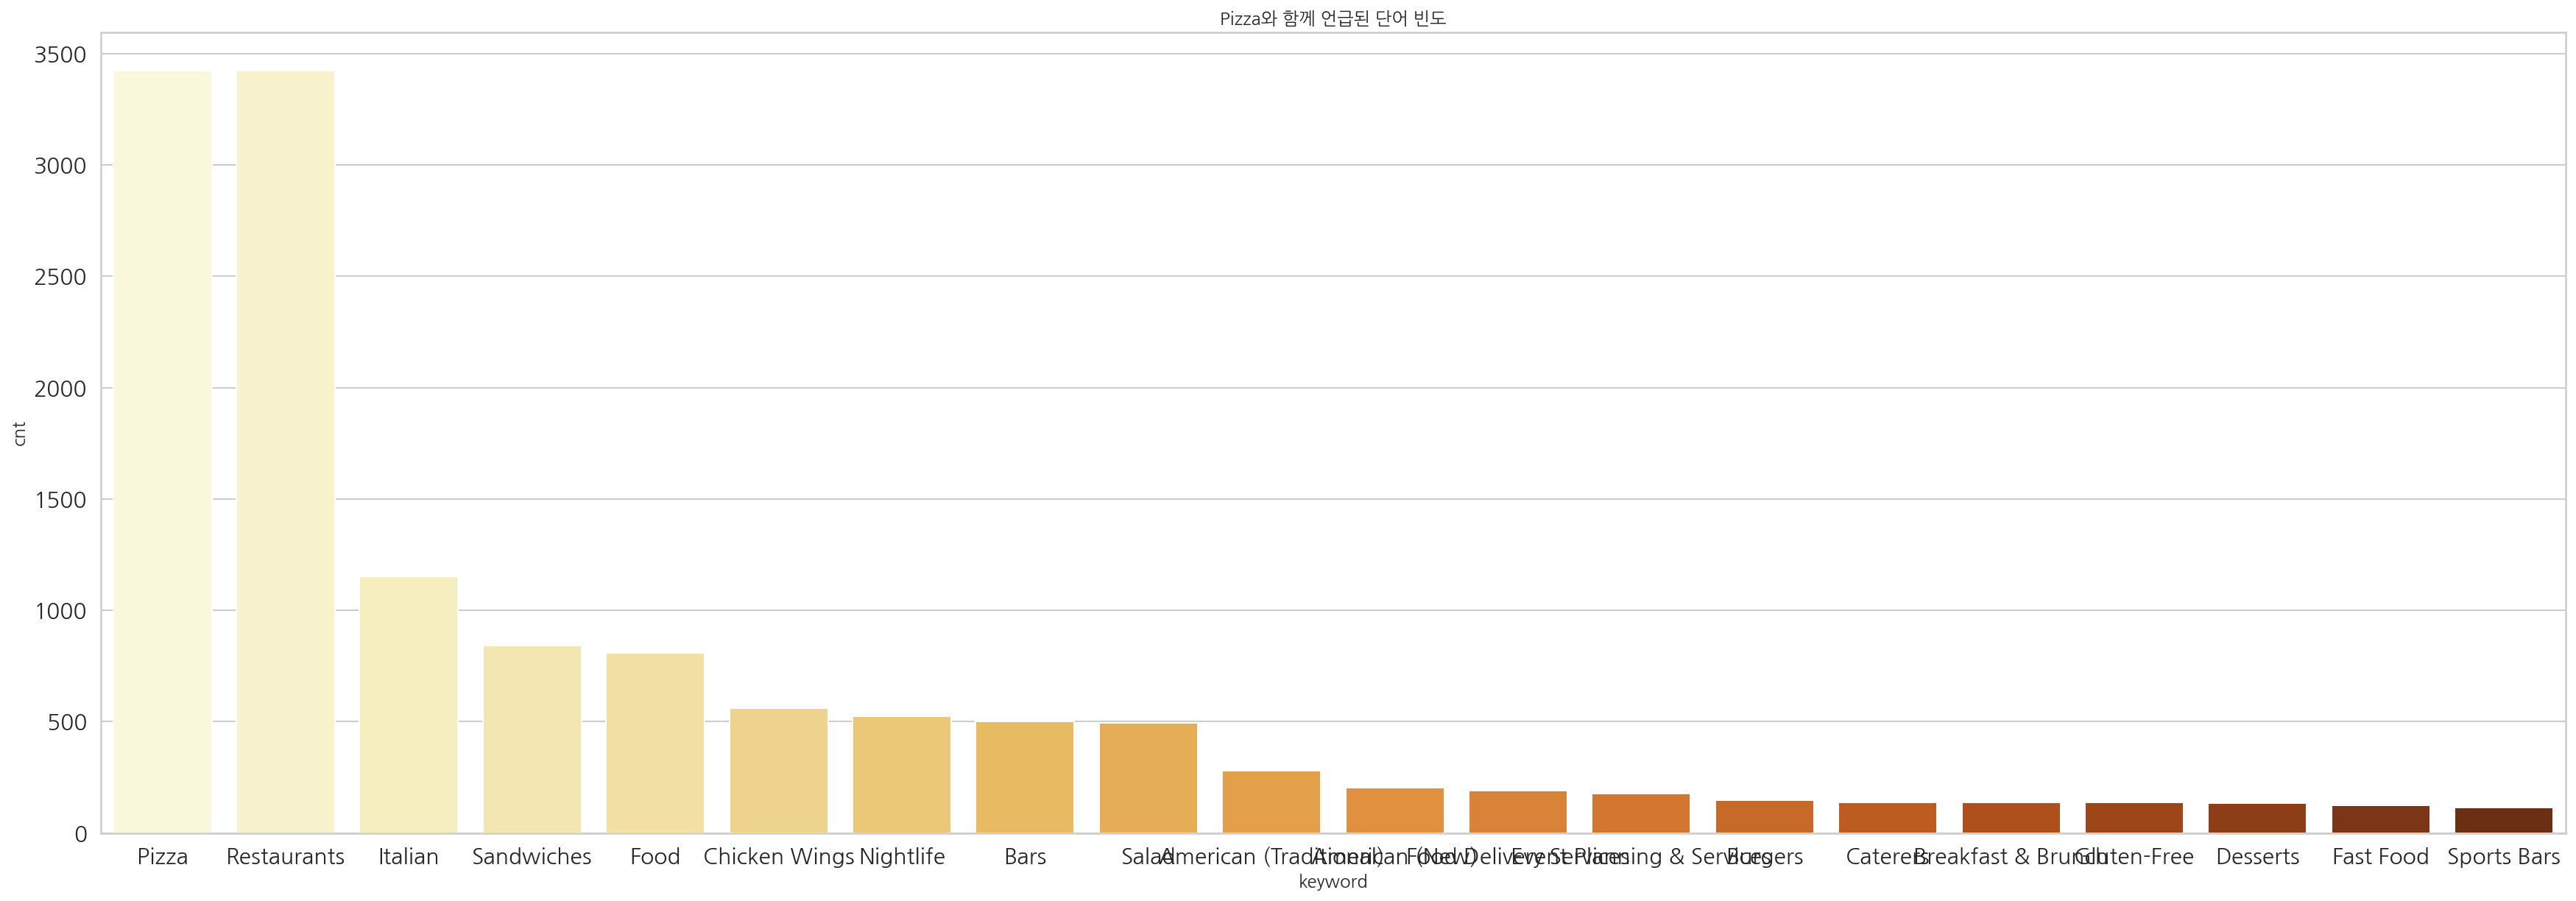

In [26]:
plt.figure(figsize=(30,10))
plt.title('Pizza와 함께 언급된 단어 빈도')

plt.rc('xtick', labelsize=14)

plt.xticks(fontsize =15)
plt.xlabel('함께 언급된 단어')

plt.yticks(fontsize =15)
plt.ylabel('빈도')

ax = sns.barplot(y= "cnt", x = "keyword", data = keyword_top20, palette=("YlOrBr"))
sns.set_context("poster")
plt.savefig('./피자와함께언급된단어빈도.png')

### 3. 비교 그룹 정의

#### 3-1. group1 : 피자와 유사 업종 그룹(전체 데이터 중,  'pizza' 와 함께 등장한 키워드들을 모두 포함하면서, 24시간 영업)

In [27]:
#전체 데이터 중, 24시간 영업하는 유사 단어 가게(group1)

df2 = pd.DataFrame([])
               
for i in keyword_all:
    df2= df2.append(business_check[business_check['categories'].str.contains(i)])
    
new_df2 = df2[['business_id', 'name', 'stars', 'categories','tot_hours', 'checkin_cnt', 'date','open_hour_avg' ]]
new_df2 = new_df2.drop_duplicates()
group1 = new_df2[new_df2['tot_hours']==168]
len(group1)

4187

#### 3-2 group2: 24시간 영업하지 않는 피자 가게(전체 데이터 중, 카테고리에 ‘Pizza’ 를 포함하면서 24시간 비영업)

In [28]:
#24시간 영업하지 않는 피자 가게
group2 = pizza_all[pizza_all['tot_hours']<168]
group = group2.reset_index(drop=True)
len(group2)

3411

#### 시간 당 가게 별 체크인 건수 분포 확인

In [29]:
# 시간대 별 체크인 건수 집계 위한 함수 생성

def open_hour_list(list_):
    lst_hr = [datetime.strptime(v.strip(), '%Y-%m-%d %H:%M:%S').hour for v in list_]
    result = collections.Counter(lst_hr)
    return result  

In [30]:
#group1 : 시간대 별 체크인 건수
group1['checkin_hour_cnt'] = group1['date'].str.split(",").apply(open_hour_list)
hour_sum = pd.DataFrame.from_dict(group1['checkin_hour_cnt'].sum(), orient='index').reset_index()
hour_sum.columns = ['hour', 'cnt']
hour_sum['rate'] = (hour_sum['cnt']/ hour_sum['cnt'].sum()) * 100
checkin_hour_sum = hour_sum.sort_values(by='hour')
checkin_hour_sum = checkin_hour_sum.reset_index(drop=True)
checkin_hour_sum

,hour,cnt,rate
0,0,55596,5.297561
1,1,49587,4.724983
2,2,43031,4.100284
3,3,36691,3.496166
4,4,29152,2.777799
5,5,21003,2.001307
6,6,14309,1.363458
7,7,10617,1.011659
8,8,9708,0.925044
9,9,16092,1.533354


In [31]:
#시간대 별로, group 2의 영업시간 내 체크인 건수
group2 = group2.reset_index(drop=True)
group2['checkin_hour_cnt'] = group2['date'].str.split(",").apply(open_hour_list)

ls = []

for i in range(len(group2)):
    b = dict( (key, value) for (key, value) in group2['checkin_hour_cnt'][i].items() 
             if key >= group2['open_hour'].loc[i] and key <= group2['closed_hour'].loc[i])
    ls.append(b)
group2['open_hour_checkin'] = pd.DataFrame(pd.Series(ls))
group2['open_hour_checkin'] = group2['open_hour_checkin'].apply(collections.Counter)
hour_sum = pd.DataFrame.from_dict(group2['open_hour_checkin'].sum(), orient='index').reset_index()
hour_sum.columns = ['hour', 'checkin_cnt']
hour_sum

,hour,checkin_cnt
0,21,39385
1,12,1753
2,22,50084
3,17,37252
4,15,12465
5,19,35365
6,18,35891
7,20,33960
8,23,44978
9,11,1055


In [32]:
#시간대 별로 group2의 해당 시간에 영업하는 가게의 개수
group2_ = group2[['business_id', 'categories', 'hours', 'date','open_hour','closed_hour']]
group2_ = group2_[group2_['open_hour'].notnull()]
group2_=group2_.reset_index(drop=True)

ls = []

for i in range(len(group2_)):
    open_h = int(group2_['open_hour'].loc[i])
    diff = int(group2_['closed_hour'].loc[i] - group2_['open_hour'].loc[i])
    ls.append([i for i in range(open_h, open_h+diff+1)])
m = pd.Series(ls)

group2_['open_hour_list1'] = pd.DataFrame(m)
group2_['open_hour_list2'] = group2_['open_hour_list1'].apply(collections.Counter)
group2_['open_hour_list2'].head()

0    {11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17:...
1    {11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17:...
2    {11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17:...
3    {9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: ...
4    {11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17:...
Name: open_hour_list2, dtype: object

In [33]:
hour_sum= pd.DataFrame.from_dict(group2_['open_hour_list2'].sum(), orient='index').reset_index()
hour_sum.columns = ['hours', 'cnt']
hour_sum

,hours,cnt
0,11,2928
1,12,3109
2,13,3121
3,14,3140
4,15,3180
5,16,3328
6,17,3371
7,18,3365
8,19,3355
9,20,3314


In [34]:
#group2의 평균 오픈/종료 시간
print(group2_['open_hour'].mean(), group2_['closed_hour'].mean())

11.023746701846965 23.201993550278512


#### 3-3. group3 : 24시간 영업 피자 가게(전체 데이터 중, 카테고리에 ‘Pizza’ 를 포함하면서 24시간 영업)

In [35]:
#피자 가게 중 24시간 영업: 12곳
pizza_24hour = pizza_all[pizza_all['tot_hours']==168]
pizza_24hour=pizza_24hour.reset_index(drop=True)

In [36]:
#24시간 영업할 경우, 시간대 별 체크인 건수
pizza_24hour['checkin_hour_cnt'] = pizza_24hour['date'].str.split(",").apply(open_hour_list)
hour_sum = pd.DataFrame.from_dict(pizza_24hour['checkin_hour_cnt'].sum(), orient='index').reset_index()
hour_sum.columns = ['hour', 'cnt']
hour_sum['rate'] = (hour_sum['cnt']/ hour_sum['cnt'].sum()) * 100
checkin_hour_sum = hour_sum.sort_values(by='hour')
checkin_hour_sum = checkin_hour_sum.reset_index(drop=True)
checkin_hour_sum

,hour,cnt,rate
0,0,21,3.206107
1,1,18,2.748092
2,2,24,3.664122
3,3,19,2.900763
4,4,31,4.732824
5,5,21,3.206107
6,6,15,2.290076
7,7,6,0.916031
8,8,11,1.679389
9,9,11,1.679389


### 4. Portland 지역 피자 가게 탐색

In [37]:
#포틀랜드 지역 데이터 추출
portland = business_check[(business_check['state']=='OR') & ((business_check['city'].str.contains('Port')) | (business_check['city'].str.contains('port')))]
portland = portland.reset_index(drop=True)
portland.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,checkin_2017,tot_hours,day_open_hours,open_days,checkin_cnt,open_hour_avg,hours_test,open_hour,closed_hour,categories1
0,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,...,108,90.0,"{'Monday': 13.0, 'Tuesday': 12.0, 'Wednesday':...",7,1180,12.857143,"(5, 18)",5.0,18.0,"[Salad, Soup, Sandwiches, Delis, Restauran..."
1,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,...,4,28.0,"{'Thursday': 7.0, 'Friday': 7.0, 'Saturday': 7...",4,45,7.000000,"(11, 18)",11.0,18.0,"[Antiques, Fashion, Used, Vintage & Consign..."
2,j68RDnvOaYEwGcY9cTEHpA,Pittock Mansion,3229 NW Pittock Dr,Portland,OR,97210,45.525259,-122.716227,4.5,406,...,284,24.0,"{'Monday': 0, 'Thursday': 6.0, 'Friday': 6.0, ...",4,1908,6.000000,"(10, 24)",10.0,24.0,"[Tours, Museums, Architectural Tours, Venue..."
3,uMGsjQGT35rX4AAt1Hp9og,Laurelhurst Chiropractic,"2705 E Burnside St, Ste 213",Portland,OR,97214,45.523103,-122.638005,4.5,25,...,2,27.0,"{'Monday': 0, 'Tuesday': 9.0, 'Wednesday': 9.0...",3,17,9.000000,"(9, 24)",9.0,24.0,"[Acupuncture, Prenatal/Perinatal Care, Healt..."
4,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,Portland,OR,97230,45.526473,-122.535323,3.5,19,...,3,114.0,"{'Monday': 16.0, 'Tuesday': 16.0, 'Wednesday':...",7,328,16.285714,"(7, 24)",7.0,24.0,"[Nightlife, Sandwiches, Seafood, Restaurants]"


In [38]:
# 포틀랜드 피자가게 개수
#portland['categories'] = portland['categories'].fillna('None')
portland_pizza = portland[portland['categories'].str.contains('Pizza')]
portland_pizza1 = portland_pizza[portland_pizza['hours'].notnull()]
portland_pizza2 = portland_pizza1.reset_index(drop=True)
len(portland_pizza2)

233

In [39]:
#포트랜드 피자가게 지도
map = folium.Map(location = [45.5, -122.59] , zoom_start =12)

list1=[]
list2=[]
marker_cluster = MarkerCluster().add_to(map)
for a in portland_pizza2.index:
    folium.Marker(location = [portland_pizza2["latitude"].loc[a], portland_pizza2["longitude"].loc[a]],
                  zoom_start=12).add_to(marker_cluster)
    list1.append(portland_pizza2["latitude"].loc[a])
    list2.append(portland_pizza2["longitude"].loc[a])

map

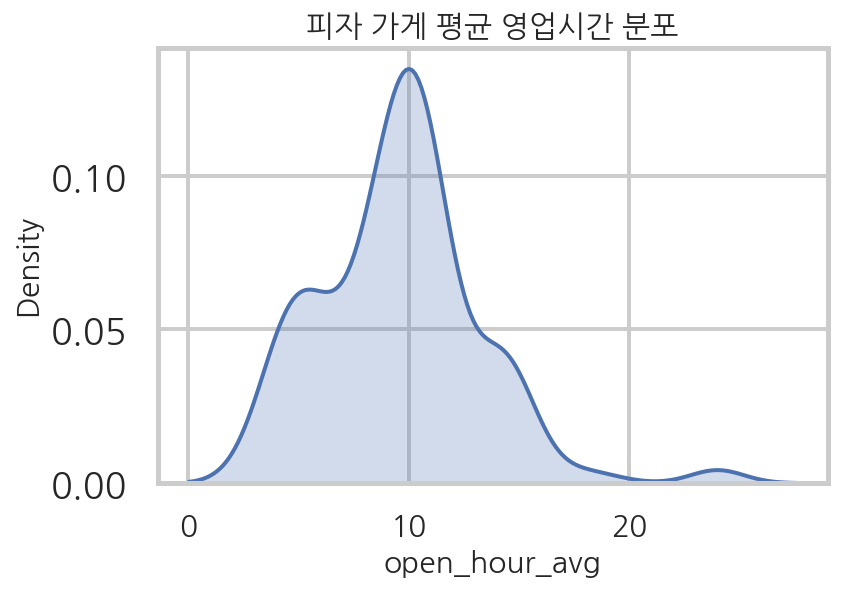

In [40]:
# 평균 영업시간 분포 그래프

plt.rc('font', family='NanumGothic') 

sns.kdeplot(portland_pizza2['open_hour_avg'], shade=True, clip = (0, 180), color="b")

plt.title('피자 가게 평균 영업시간 분포', fontsize=15)

plt.xlabel('open_hour_avg', size='15')
plt.ylabel('Density', size='15')

plt.xticks(fontsize=15)
plt.yticks(fontsize=18)

#plt.show()
plt.savefig('./포클랜드피자평균영업시간.png')

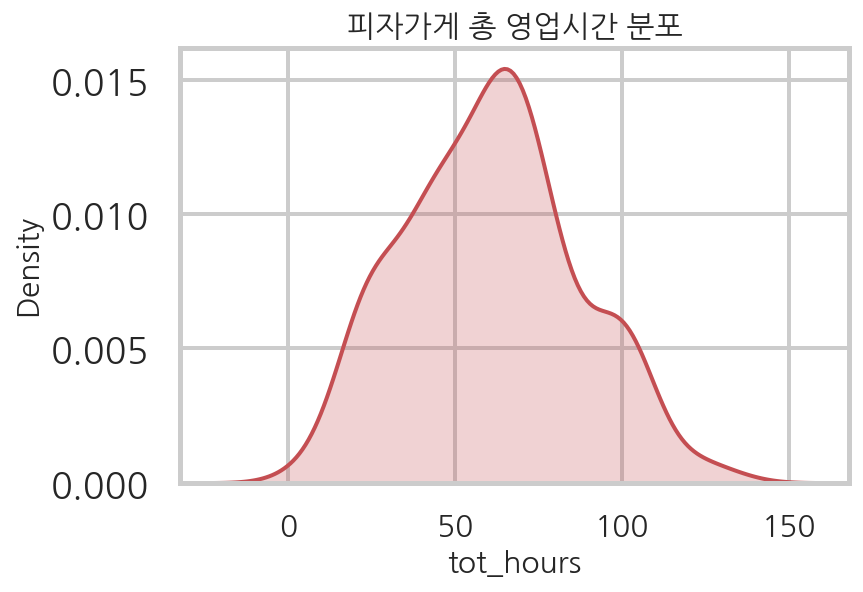

<Figure size 432x288 with 0 Axes>

In [41]:
# 총 영업시간 분포 그래프

plt.rc('font', family='NanumGothic') 

sns.kdeplot(portland_pizza2['tot_hours'], shade=True, color="r")

plt.title('피자가게 총 영업시간 분포', fontsize=15)

plt.xlabel('tot_hours', size='15')
plt.ylabel('Density', size='15')

plt.xticks(fontsize=15)
plt.yticks(fontsize=18)

plt.show()
plt.savefig('./포틀랜드피자총영업시간.png')

In [42]:
# 5. 포트랜드 지역 피자가게의 영업 일수 분포
portland_pizza2['open_days'].value_counts()

7    119
6     75
5     25
4      8
1      3
3      3
Name: open_days, dtype: int64

In [43]:
#6. 포트랜드 지역의 피자가게 : 영업시간 내 시간대 별 체크인 건수
portland_pizza2 = portland_pizza2.reset_index(drop=True)
#portland_pizza2['open_hour'] = portland_pizza2['hours'].apply(open_closed_hour).str[0]
#portland_pizza2['closed_hour'] = portland_pizza2['hours'].apply(open_closed_hour).str[1]
portland_pizza2['checkin_hour_cnt'] = portland_pizza2['date'].str.split(",").apply(open_hour_list)

ls = []

for i in range(len(portland_pizza2)):
    b = dict( (key, value) for (key, value) in portland_pizza2['checkin_hour_cnt'][i].items() 
             if key >= portland_pizza2['open_hour'].loc[i] and key <= portland_pizza2['closed_hour'].loc[i])
    ls.append(b)
portland_pizza2['open_hour_checkin'] = pd.DataFrame(pd.Series(ls))
portland_pizza2['open_hour_checkin'] = portland_pizza2['open_hour_checkin'].apply(collections.Counter)
hour_sum = pd.DataFrame.from_dict(portland_pizza2['open_hour_checkin'].sum(), orient='index').reset_index()
hour_sum.columns = ['hour', 'checkin_cnt']
hour_sum

,hour,checkin_cnt
0,22,4513
1,19,5987
2,20,6712
3,23,3705
4,18,3139
5,21,5698
6,14,247
7,17,1143
8,16,830
9,15,501


In [44]:
#6. 포틀랜드 피자 가게 - 시간대 별로, 해당 시간에 영업하는 가게의 개수

ls = []

for i in range(len(portland_pizza2)):
    open_h = int(portland_pizza2['open_hour'].loc[i])
    diff = int(portland_pizza2['closed_hour'].loc[i] - portland_pizza2['open_hour'].loc[i])
    ls.append([i for i in range(open_h, open_h+diff+1)])
m = pd.Series(ls)

portland_pizza2['open_hour_list1'] = pd.DataFrame(m)
portland_pizza2['open_hour_list2'] = portland_pizza2['open_hour_list1'].apply(collections.Counter)

hour_sum= pd.DataFrame.from_dict(portland_pizza2['open_hour_list2'].sum(), orient='index').reset_index()
hour_sum.columns = ['hours', 'cnt']
hour_sum

,hours,cnt
0,11,154
1,12,179
2,13,182
3,14,185
4,15,190
5,16,225
6,17,228
7,18,228
8,19,228
9,20,225


### 7. 현재 포트랜드 영업중인 피자 가게들의 24시간 영업 가정했을 경우, 시간대 별 체크인 증감 시뮬레이션

In [45]:
#포트랜드 지역 피자 가게(24시간 운영X)의 가게 별 체크인 횟수(표준화 처리) vs group3 기반 예측한 시간대 별 체크인 횟수(표준화 처리)
simulation_data = pd.read_csv('./wilcoxon.csv')
simulation_data.head()

,hour,checkin_per_store,checkin_per_store(24hour predict)
0,0,0.0,13.77
1,1,0.0,9.44
2,2,0.0,5.90
3,3,0.0,0.00
4,4,0.0,0.00


In [46]:
#데이터 정규성 검정 : p-value <0.05로 정규성 가정 만족 X => 대응표본 t-test 불가 
x = np.subtract(np.array(simulation_data['checkin_per_store']), np.array(simulation_data['checkin_per_store(24hour predict)']))
shapiro(x)

ShapiroResult(statistic=0.9142259955406189, pvalue=0.04359899461269379)

In [47]:
#등분산성 검정: p-value > 0.05로 등분산성 가정 만족

x1 = simulation_data['checkin_per_store']
x2 = simulation_data['checkin_per_store(24hour predict)']

df1, df2 = len(x1) - 1,len(x2) - 1
v = (np.var(x1, ddof=1), np.var(x2, ddof=1))
F = max(v) / min(v)
cdf = f(df1, df2).cdf(F)
p_value = 2 * min(cdf, 1 - cdf)
print(F, p_value)

1.1727497634199746 0.7055912533422197


In [48]:
# 대응 표본 t-test 불가하여, 윌콕슨 부호 순위검정 수행
# 귀무가설: 24시간 영업 효과가 없다, 대립가설: 24시간 영업 효과가 있다.
w, p = scipy.stats.wilcoxon(x) # p-value > 0.05로, 귀무가설 기각 불가.
w, p

(62.0, 0.10842674449200547)